In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

In [3]:
df = pd.read_csv("C:\\Users\\kragha\\Desktop\\Files\\AIML\\AIML_Project4\\Part1 - Car name.csv")
df1 = pd.read_json("C:\\Users\\kragha\\Desktop\\Files\\AIML\\AIML_Project4\\Part1 - Car-Attributes.json")
df = pd.concat([df,df1],axis=1)

In [4]:
df

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
394,vw pickup,44.0,4,97.0,52,2130,24.6,82,2
395,dodge rampage,32.0,4,135.0,84,2295,11.6,82,1
396,ford ranger,28.0,4,120.0,79,2625,18.6,82,1


C:\Users\kragha\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='wt', ylabel='Density'>

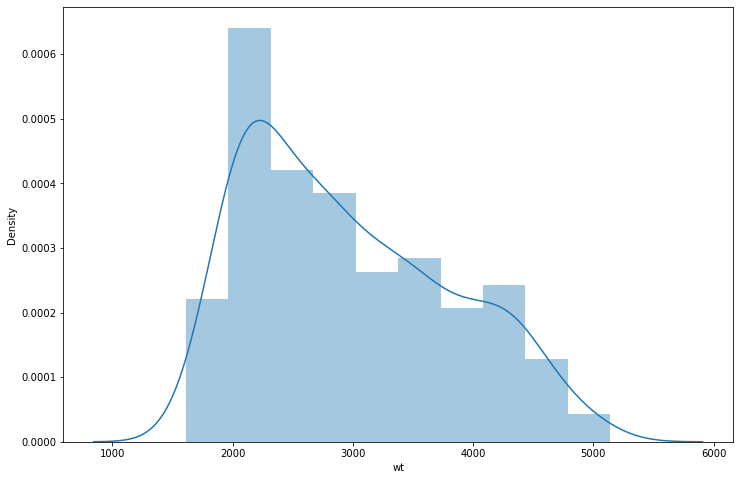

In [5]:
plt.figure(figsize=(12,8))
sns.distplot(df['wt'])


C:\Users\kragha\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='disp', ylabel='Density'>

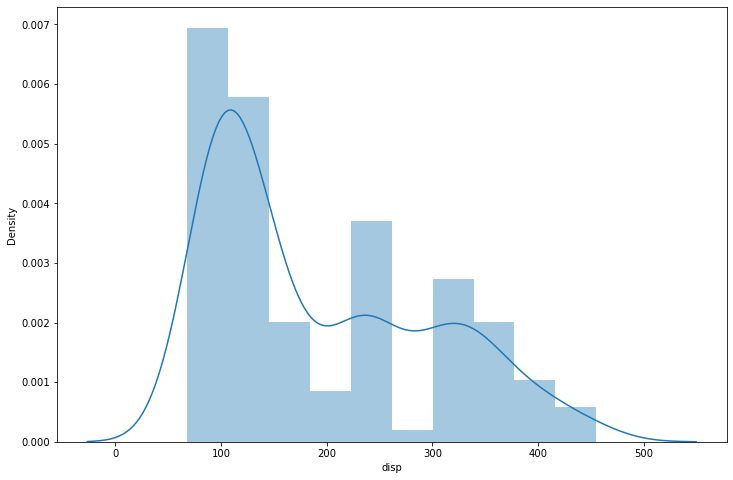

In [6]:
plt.figure(figsize=(12,8))
sns.distplot(df['disp'])

# 1.Log transformer

## We could see that both the columns mentioned above is skewed. Now lets try applying log transformer

In [26]:
# Taking np.log on the columns
Log_transformed_displacement = np.log(df['disp'])

C:\Users\kragha\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='disp', ylabel='Density'>

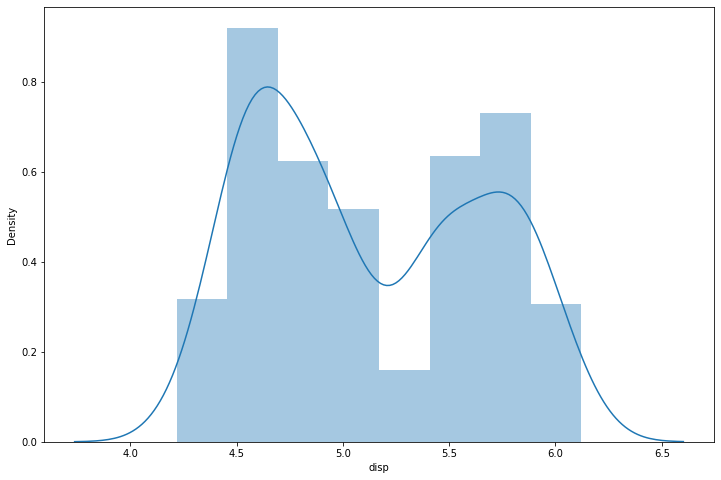

In [27]:
plt.figure(figsize=(12,8))
sns.distplot(Log_transformed_displacement)

In [28]:
df['disp'].describe()

count    398.000000
mean     193.425879
std      104.269838
min       68.000000
25%      104.250000
50%      148.500000
75%      262.000000
max      455.000000
Name: disp, dtype: float64

In [29]:
Log_transformed_displacement.describe()

count    398.000000
mean       5.123174
std        0.531279
min        4.219508
25%        4.646783
50%        5.000443
75%        5.568345
max        6.120297
Name: disp, dtype: float64

# The Skewness is reduced but the distribution has become Bi-modal. 

In [30]:
Log_transformed_weight = np.log(df['wt'])
#Now moving on to weight

C:\Users\kragha\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='wt', ylabel='Density'>

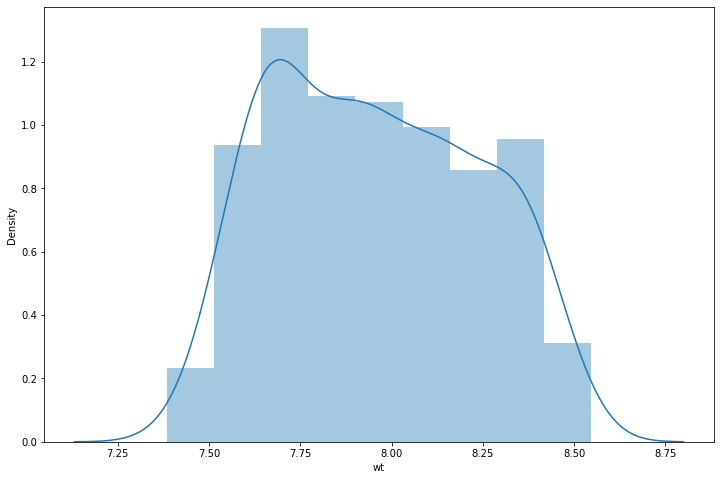

In [31]:
plt.figure(figsize=(12,8))
sns.distplot(Log_transformed_weight)

In [32]:
Log_transformed_weight.describe()

count    398.000000
mean       7.956890
std        0.280665
min        7.385851
25%        7.706950
50%        7.938623
75%        8.190909
max        8.544808
Name: wt, dtype: float64

# Weight looks comparitively better

# 2. Square Root transformer

In [33]:
Sqrt_transform_displacement = np.sqrt(df['disp'])

C:\Users\kragha\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='disp', ylabel='Density'>

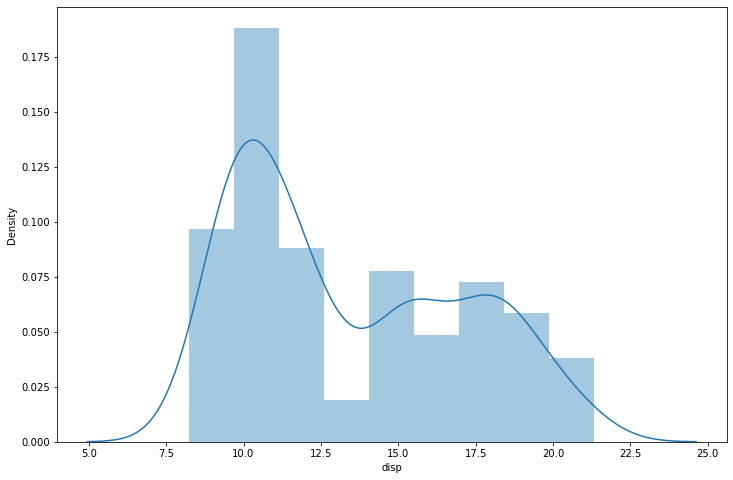

In [35]:
plt.figure(figsize=(12,8))
sns.distplot(Sqrt_transform_displacement)

#Still it is bimodal output but it did reuce skewness

In [36]:
Sqrt_transform_weight = np.sqrt(df['wt'])
#Now moving on to weight

C:\Users\kragha\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='wt', ylabel='Density'>

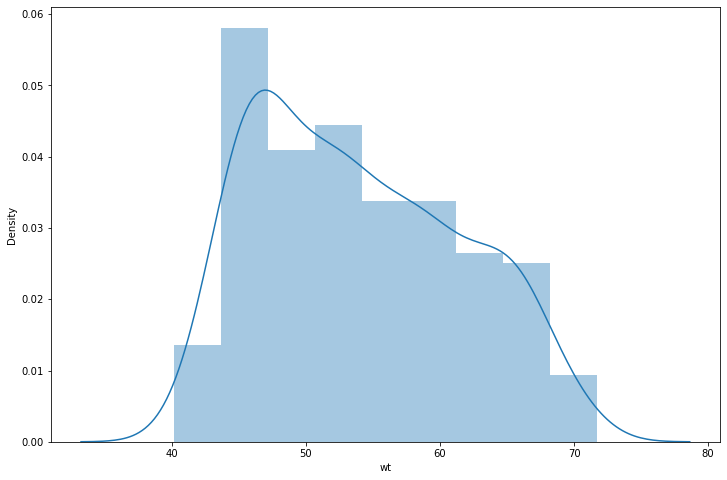

In [37]:
plt.figure(figsize=(12,8))
sns.distplot(Sqrt_transform_weight)

#Simlar to Log transformer

# 3.Box-Cox Transformation


In [38]:
from scipy.stats import boxcox

In [51]:
Box_Cox_disp = boxcox(df['disp'])
Box_Cox_disp = pd.DataFrame(Box_Cox_disp[0],columns=['Disp'])

C:\Users\kragha\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

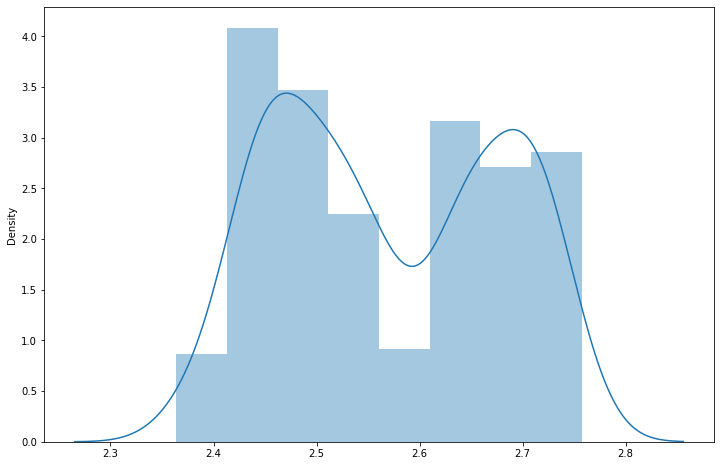

In [50]:
plt.figure(figsize=(12,8))
sns.distplot(Box_Cox_disp[0])

#Displacement is again coming to bimodal type but it did reuce skewness

In [52]:
Box_Cox_wt = boxcox(df['wt'])

C:\Users\kragha\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

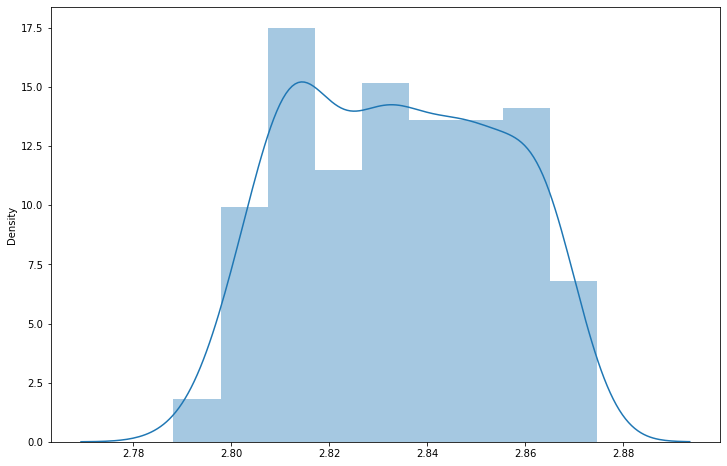

In [53]:
plt.figure(figsize=(12,8))
sns.distplot(Box_Cox_wt[0])
# A better distribution with less skewness

## Finally we see that all the transformers do the same job but Boxcox and Log transformer do the job in a better way. We basically see some smothness in the transformed data where in square root transformer the smoothness is not noticeable


## The above steps were generally to show the output of log, Sqrt and boxcox transformers but in realtime you might have to split data to Train and test or even validation 
